# Fitting Thomson Scattering Spectrum

See Spectra_fitting_README.md for details

In [1]:
%matplotlib inline
import ts_analysis as TsA
import os

# s0907_16

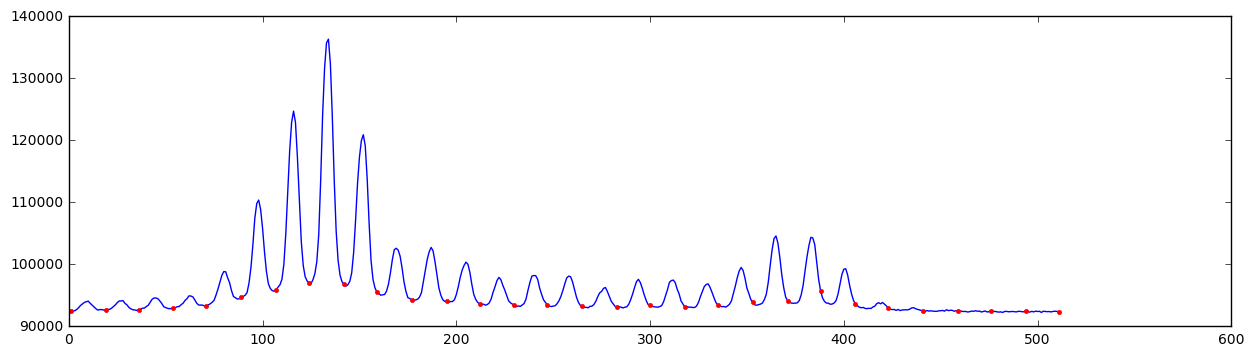

In [2]:
folder=r"\\LINNA\Users\Magpie\Documents\MAGPIE data\2016\Sept_2016\s0907_15 Reconnection Al - Faraday + TS horizontal\s0907_16 TS @ 295ns"
shot_fn='s0907_16 shot.asc'
ts=TsA.TS_Analysis(folder, shot_fn,['s0907_16 full power test @ gain 100.asc'])

ts.find_fibre_edges()

In [3]:
'''Split image into fibres'''
ts.split_into_fibres(discard_rows=3)
ts.zero_fibres(upper=1150, lower=850)
a_angle=[45]*14 #here we have fibres 1A through 14A at an angle of 45'
b_angle=[135]*14
ts.pair_fibres(a_angle,b_angle)

In [4]:
'''
Specify the plasma parameters in the form (V
alues, Minimum, Independent)
If Independent is True, then the value is fixed and minimum has no meaning
If Independent is False, then the value is an initial guess for the fit
and minimum is either a float, or None to specify no given minimum
For multi-species fits, Aj, Zj and Fj only can have their value as a tuple (A1,A2...Aj)
Even for a single-species fit, enclose A, Z and F in (), eg. 'Aj':((12), True, None)
'''
'''Choose the fibre to fit'''
Fnum=6
Fset='A'


plasma_parameters={ 'model': 'nLTE',
                    'n_e': (2.8e18,True),#in cm^-3, must be specified
                    'T_e': (25, True,0),#In electron volts. 
                    'V_fe':(0, True),#m/s.
                    'A':  ((27,), True),#in nucleon masses, must be specified
                    'T_i': (30, True,0),#In electron volts.
                    'V_fi':(0, False),#m/s.
                    'stry':(0, True), #Fraction of signal made up of stray light. >0, <1.0!!
                    'amp': (9000, False), #Fraction of signal made up of spectrum.
                    'offset': (0, False), #
                    'shift': (0, True)
                    }

'''This code fits and plots the result'''
f=ts.select_fibre(Fnum,Fset)
f.voigt_response()
f.fit_fibre(plasma_parameters)
ts.pretty_plot(Fnum,Fset, tm=1.6, sr=12)
print(f.skw_res.fit_report())

NameError: name 'reponse' is not defined

In [21]:
import numpy as np
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

l0_found=f.lamb[find_nearest(f.lamb,f.l0)]
print((l0_found-f.l0)*1e10)

-0.0174346221029


In [46]:
f.skw_res.eval()

ValueError: fp and xp are not of the same length.

In [5]:
ts.fig.savefig('Figures/s0611_15 fibre 8A largetext.pdf')

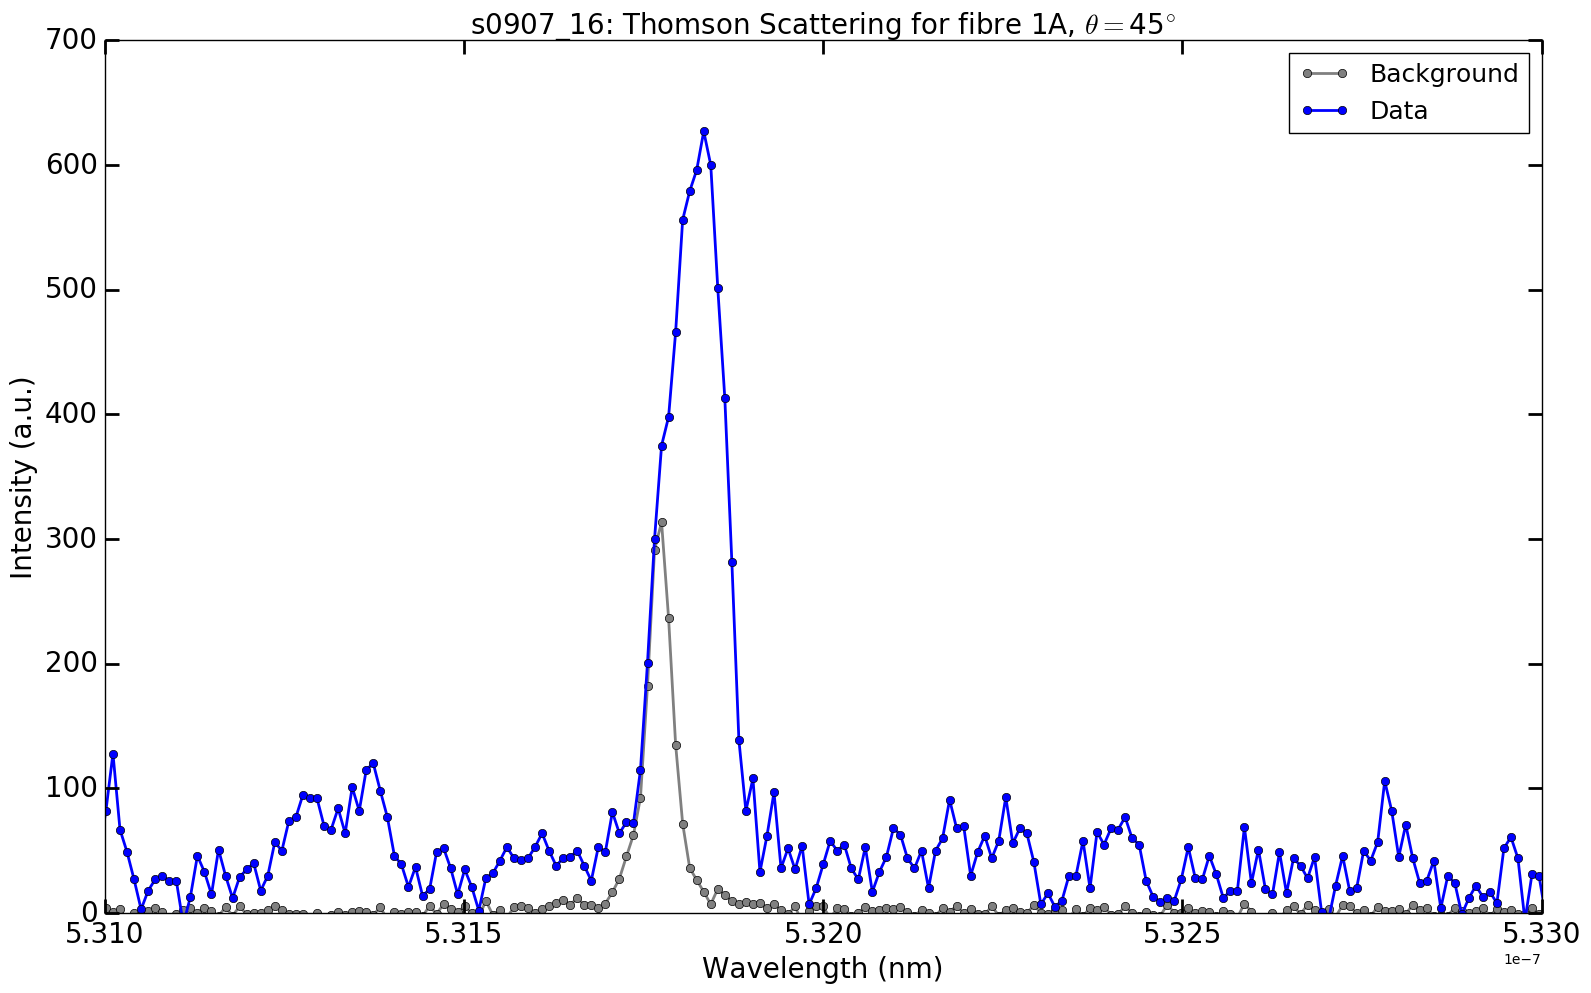

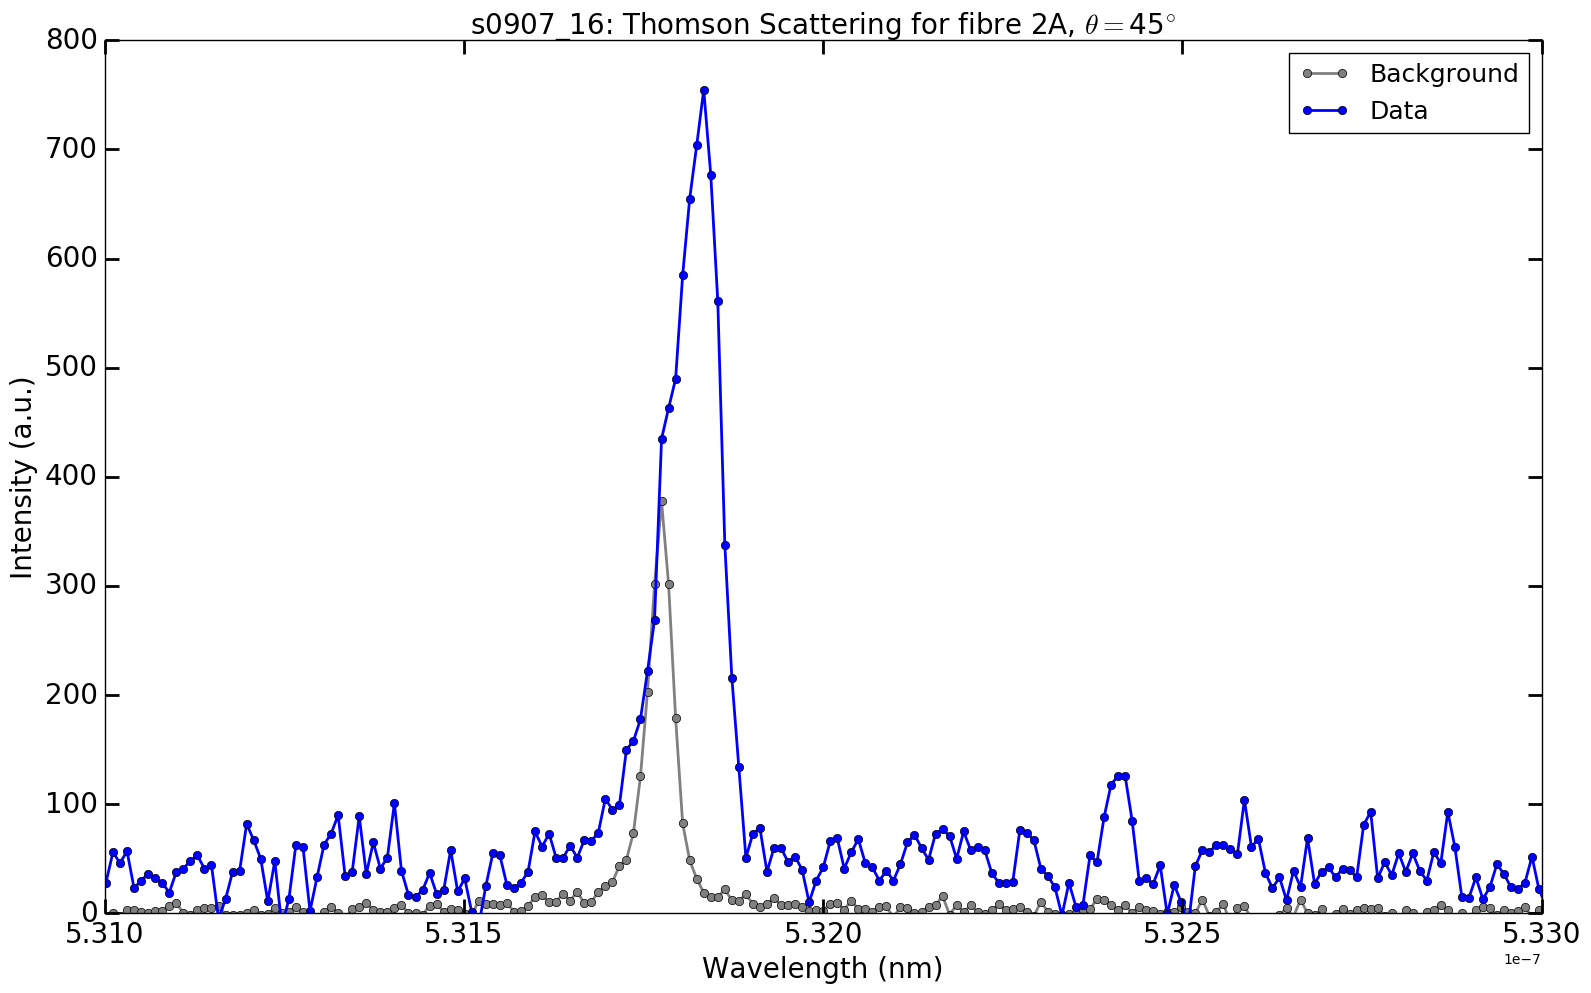

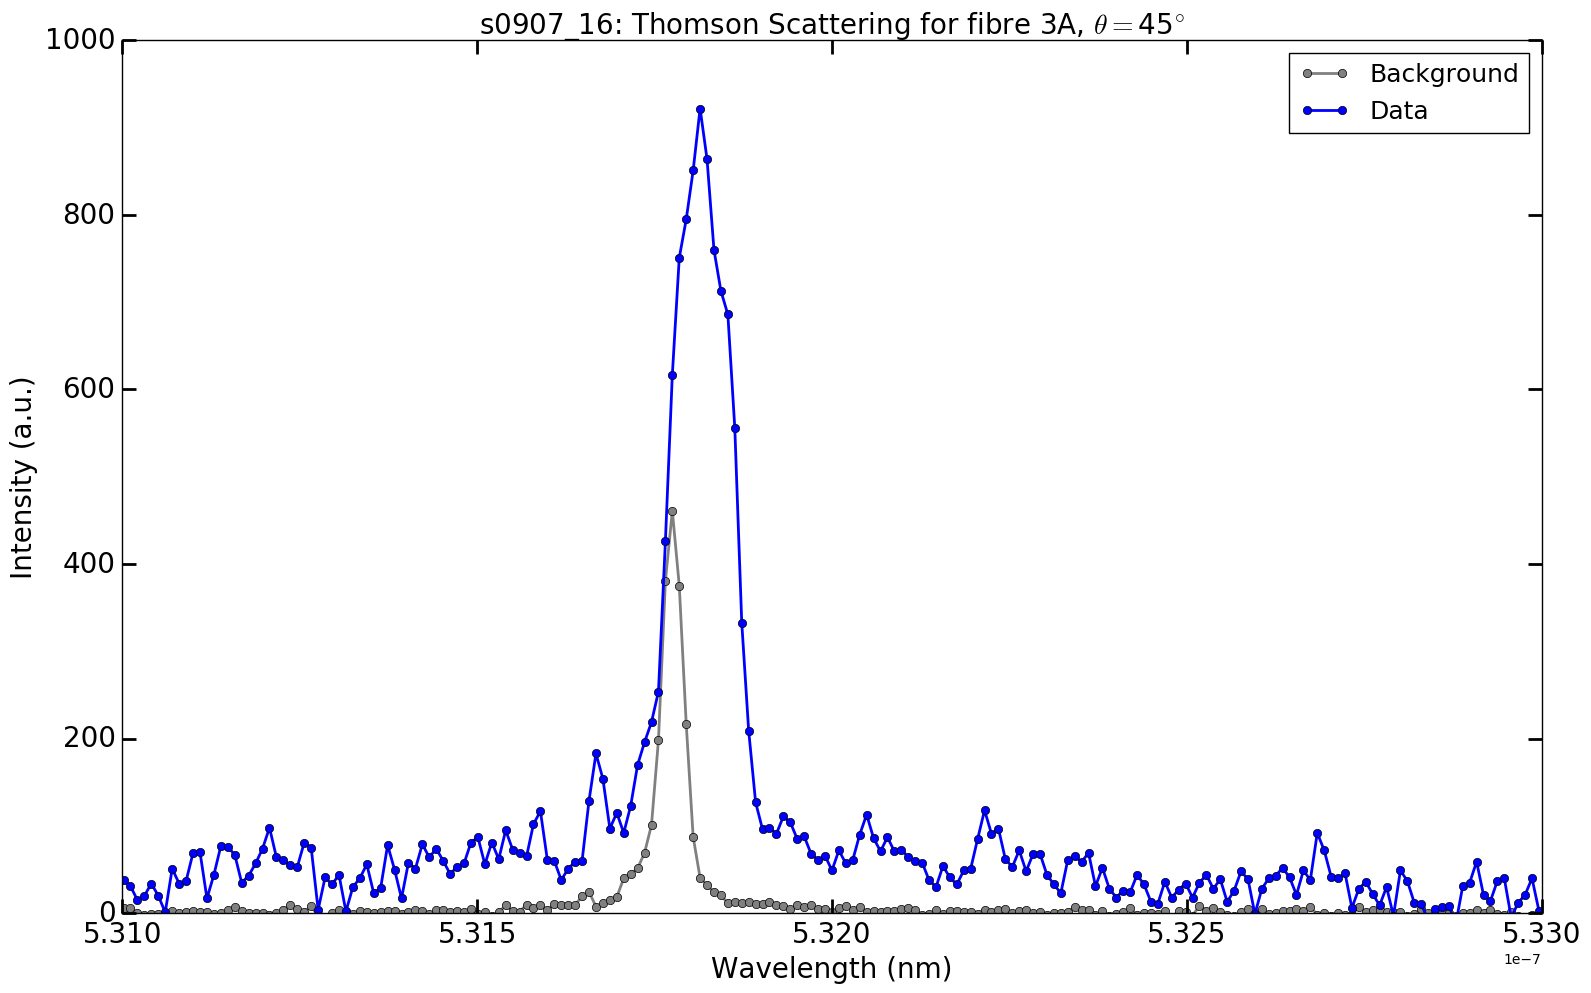

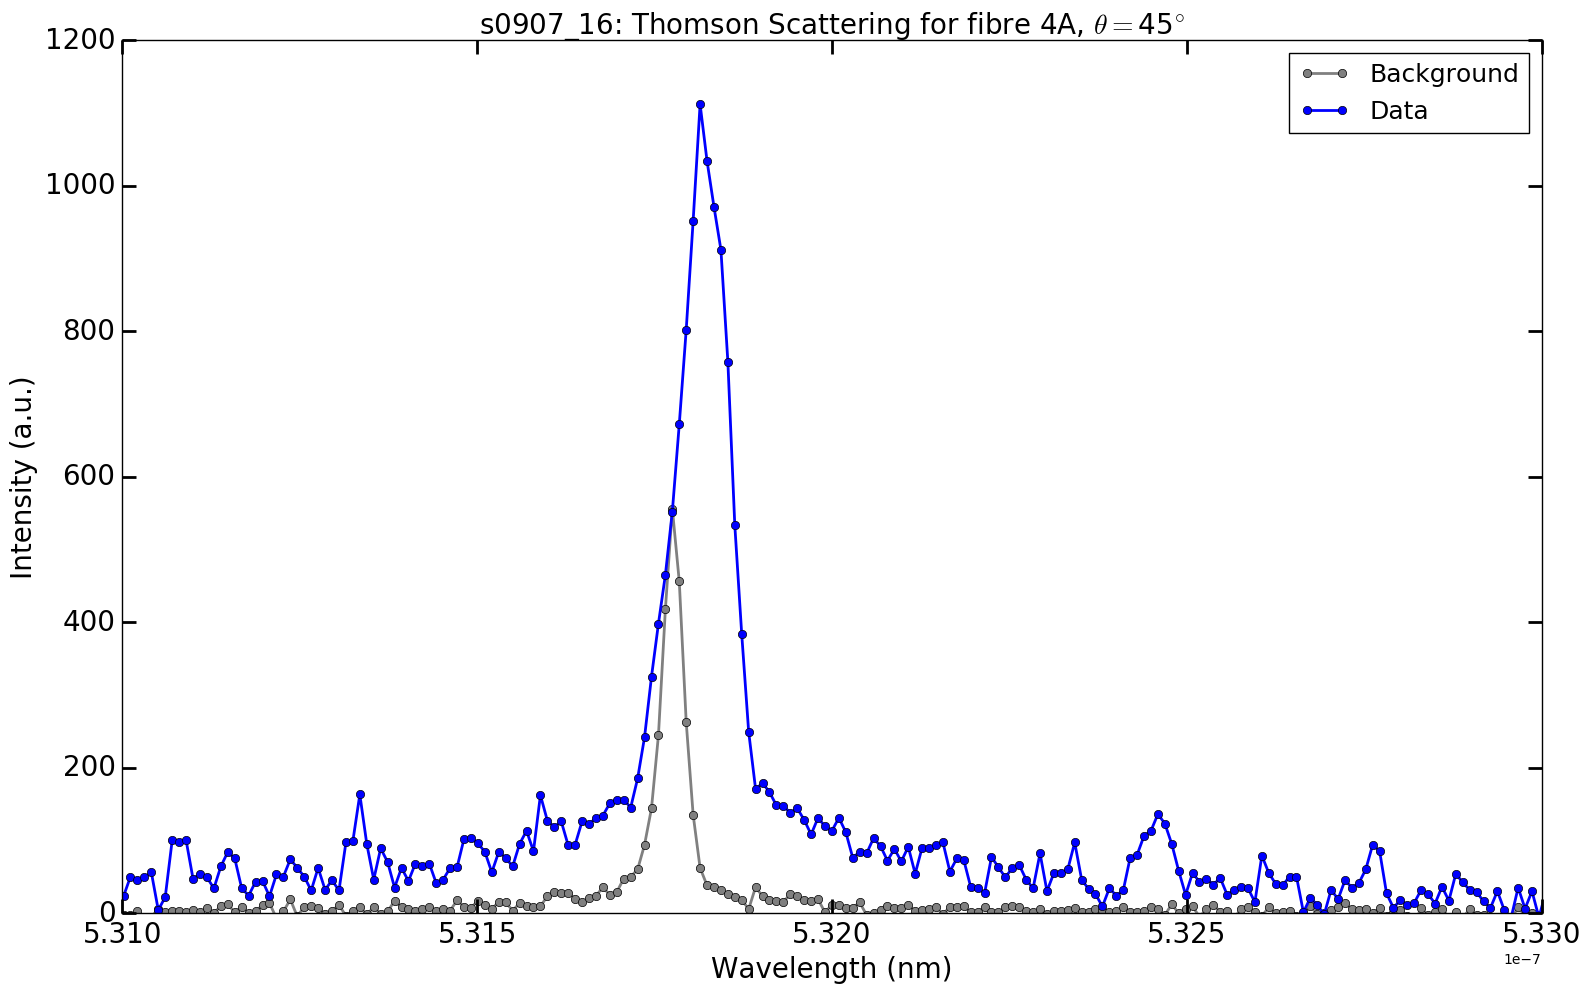

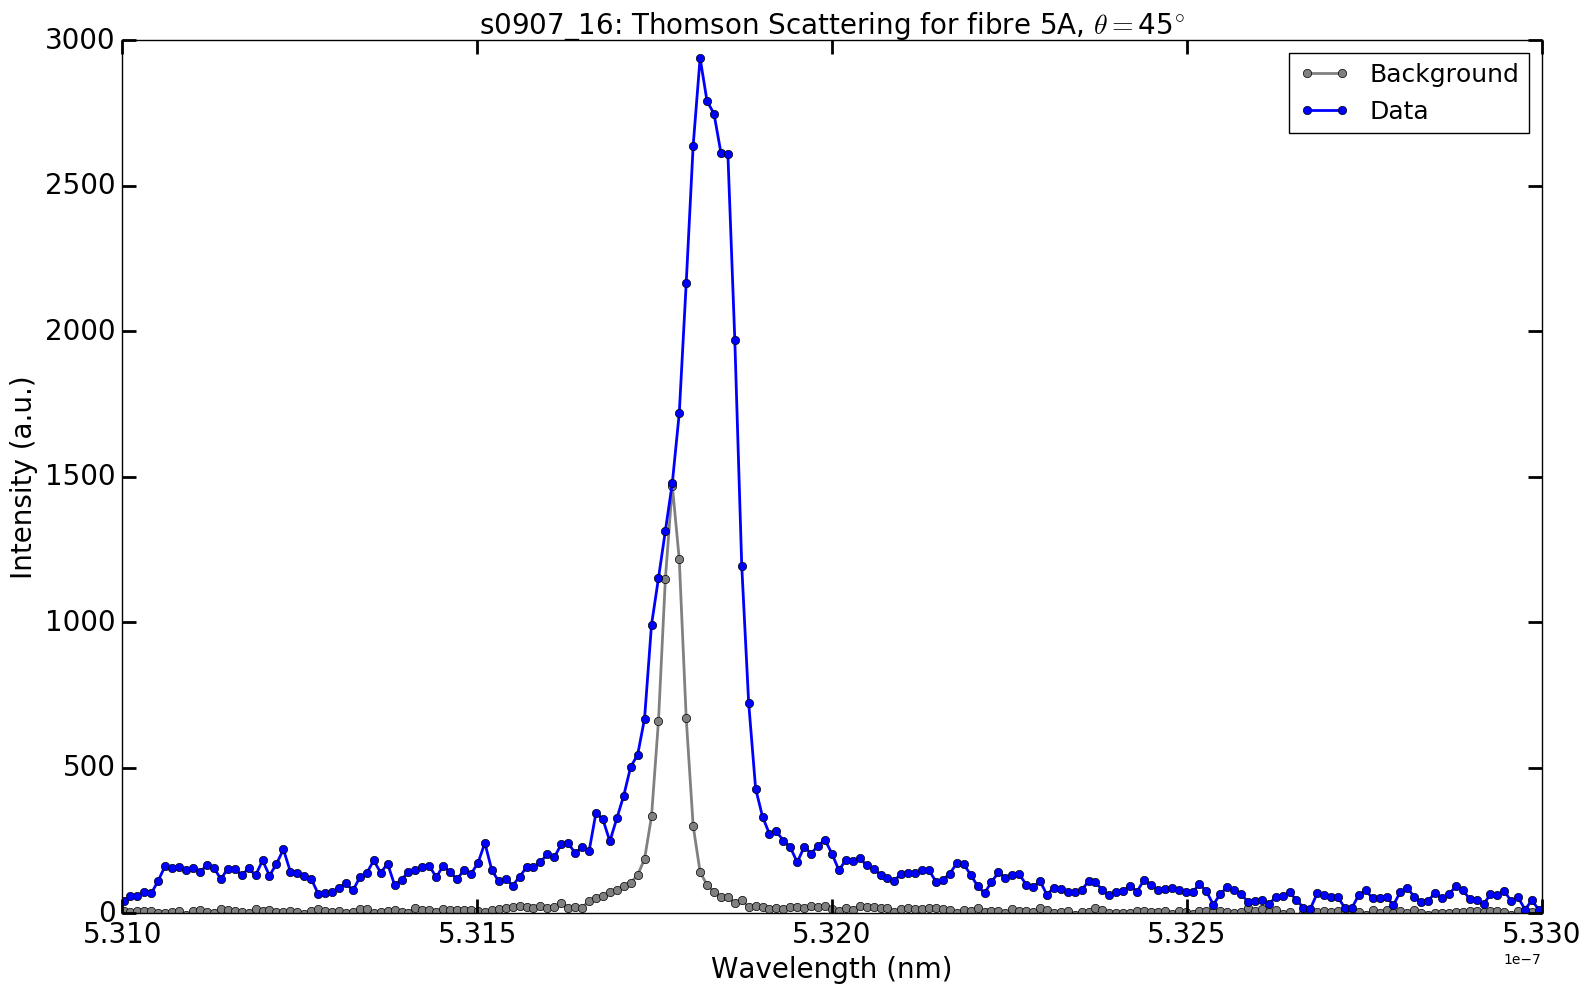

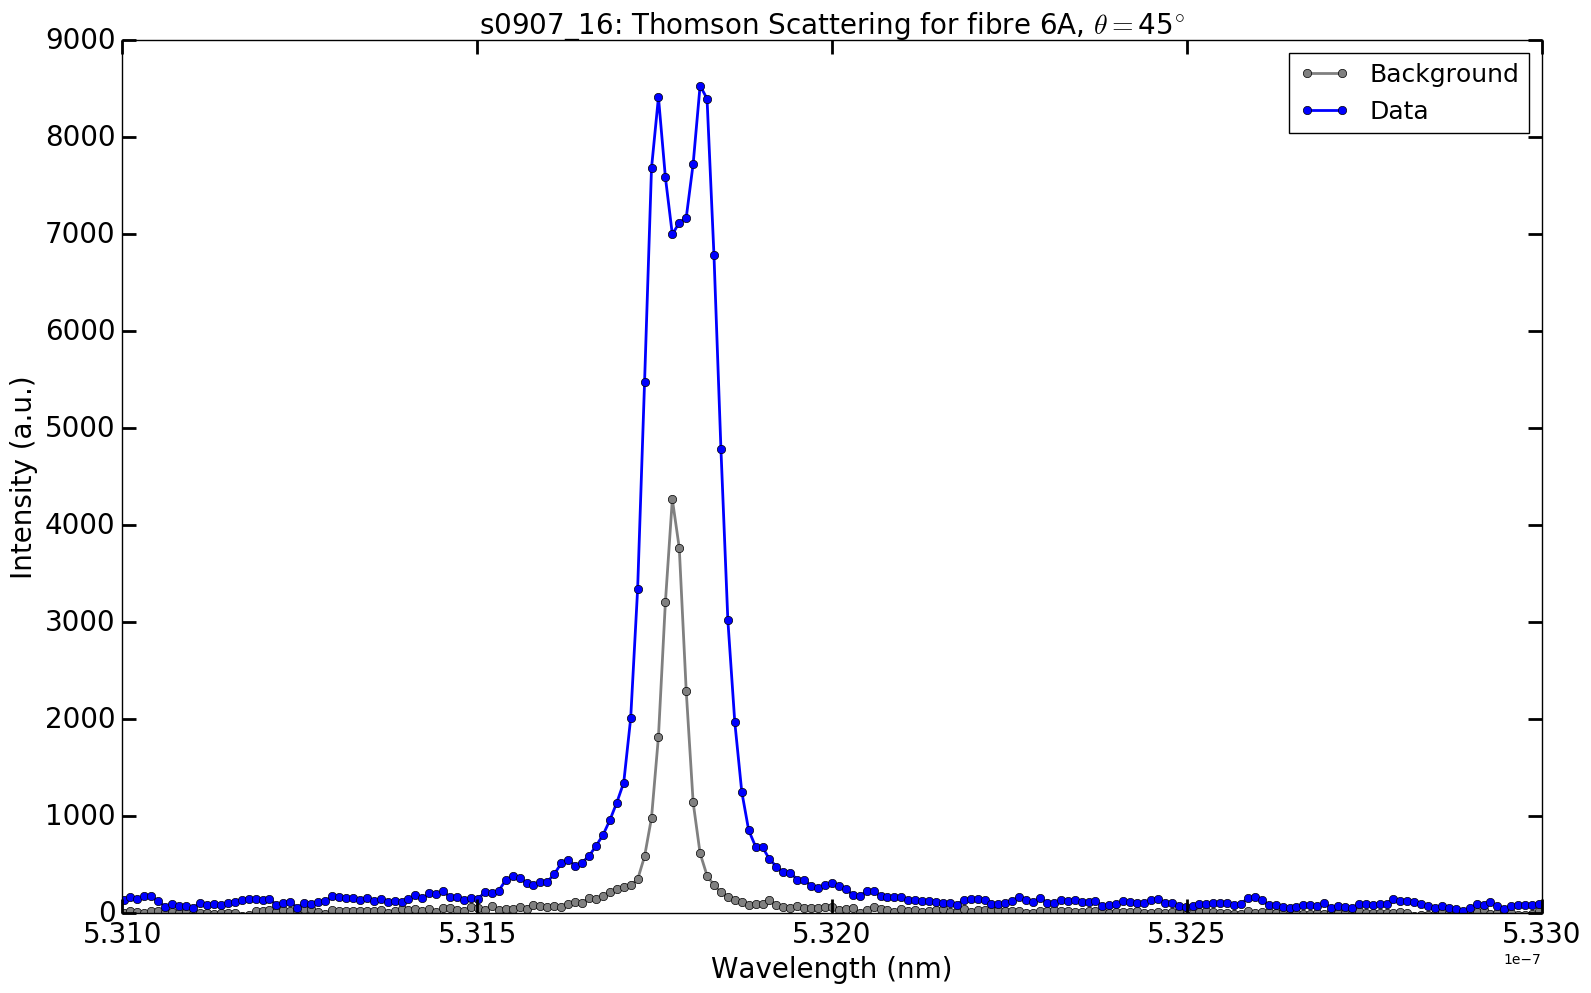

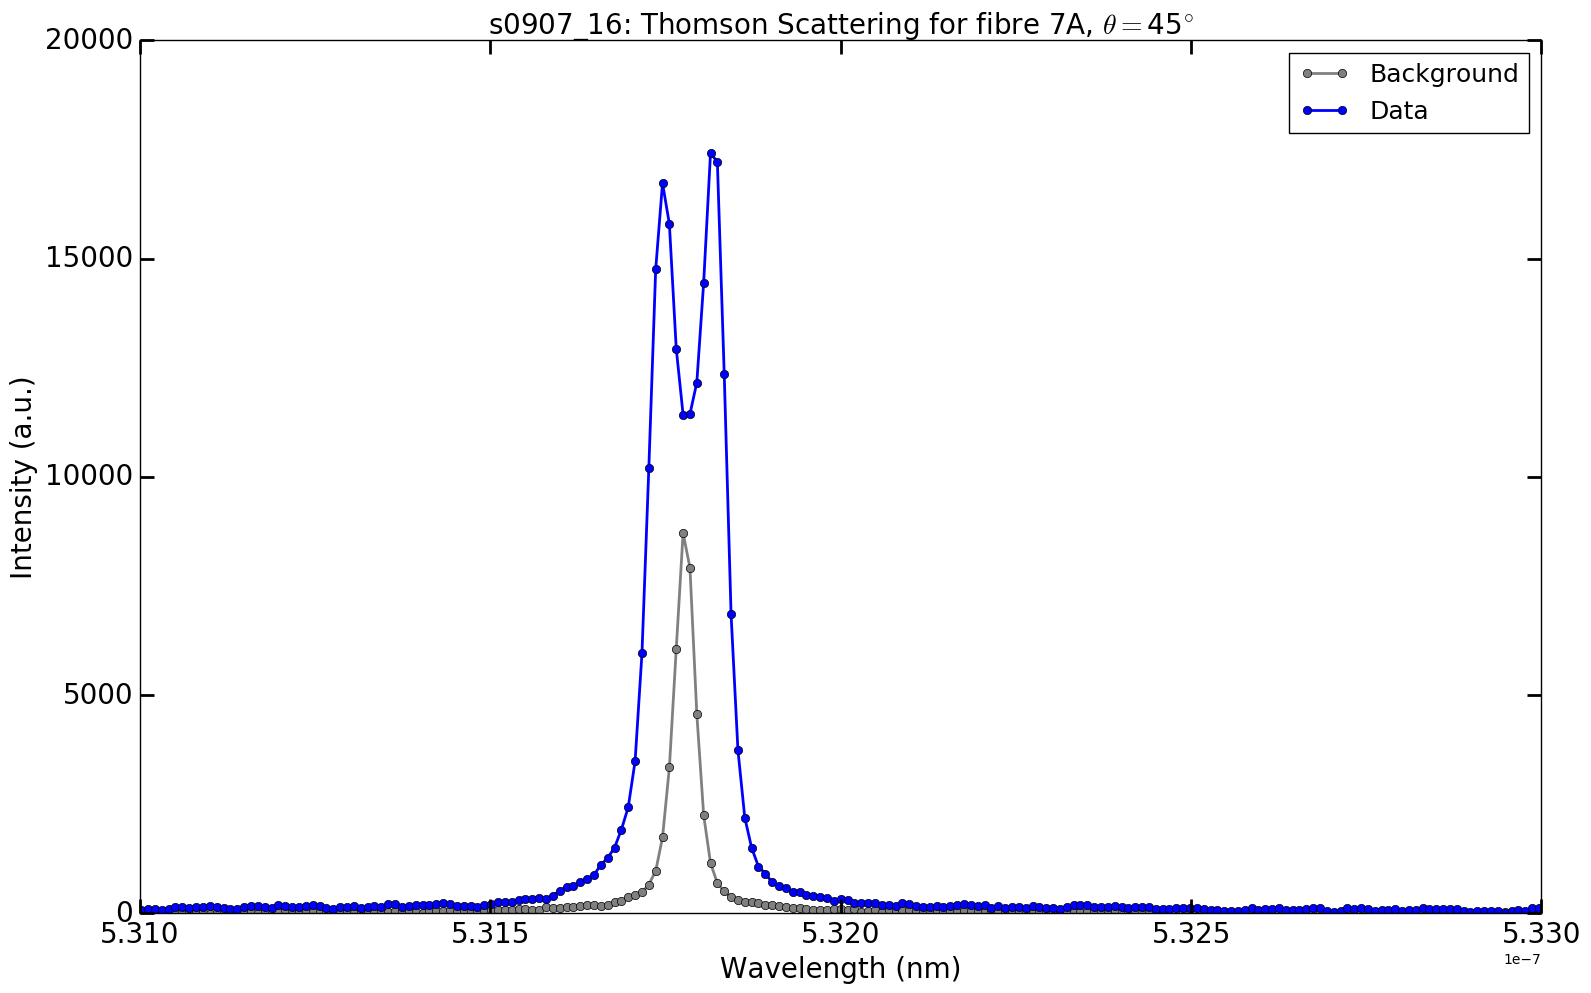

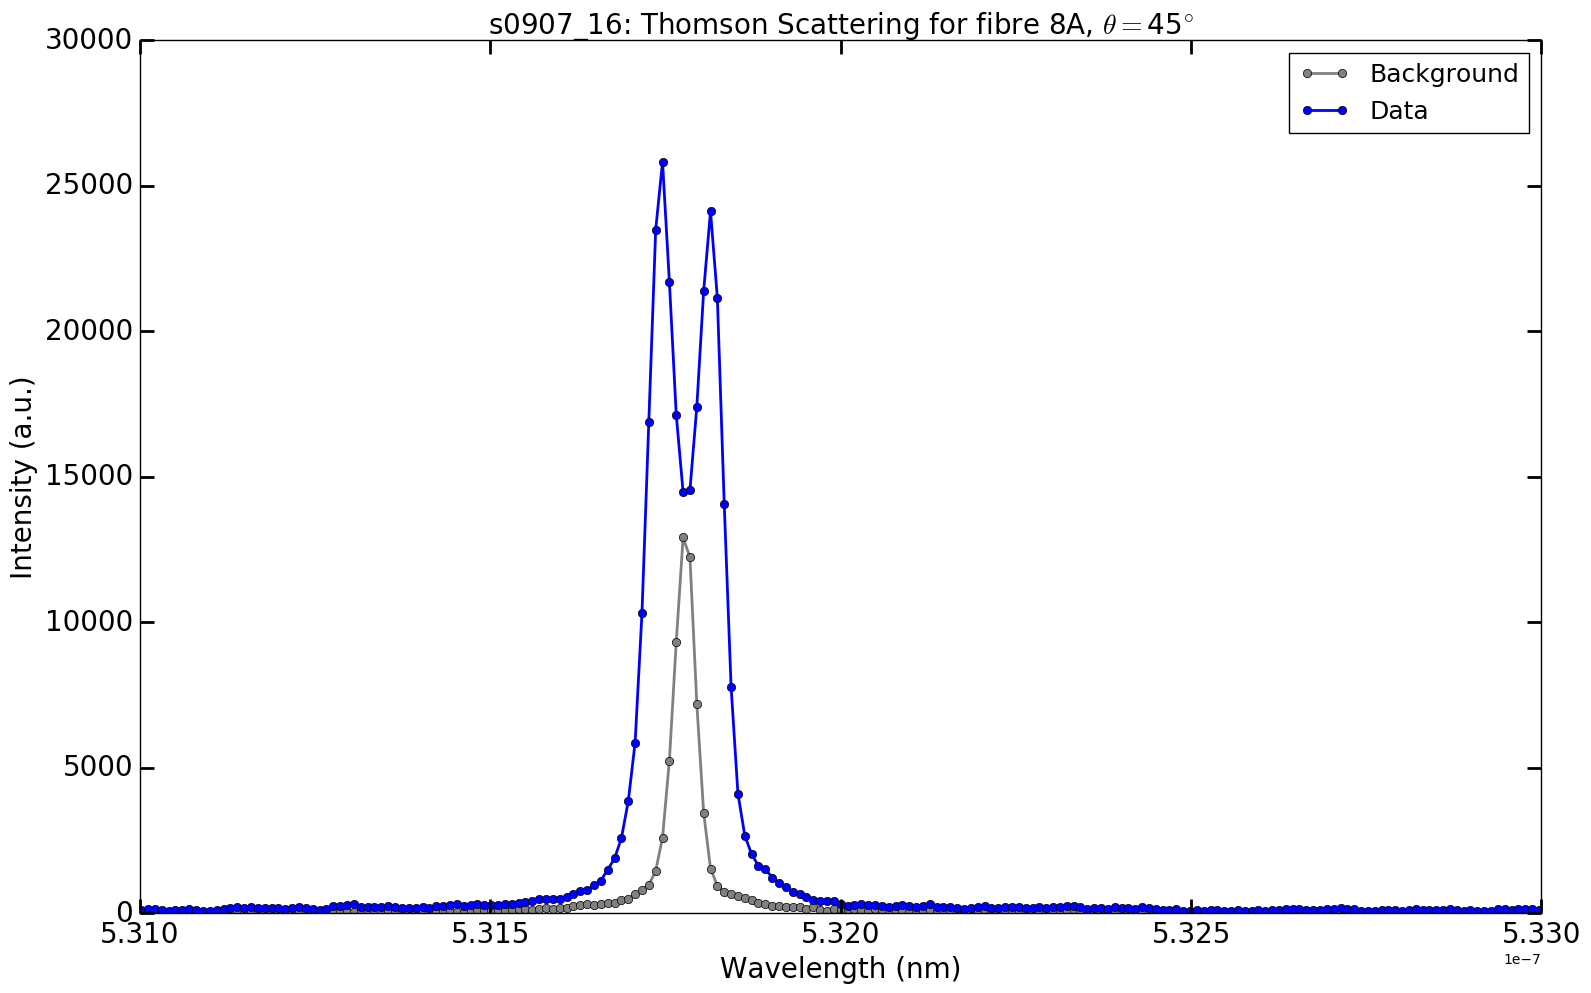

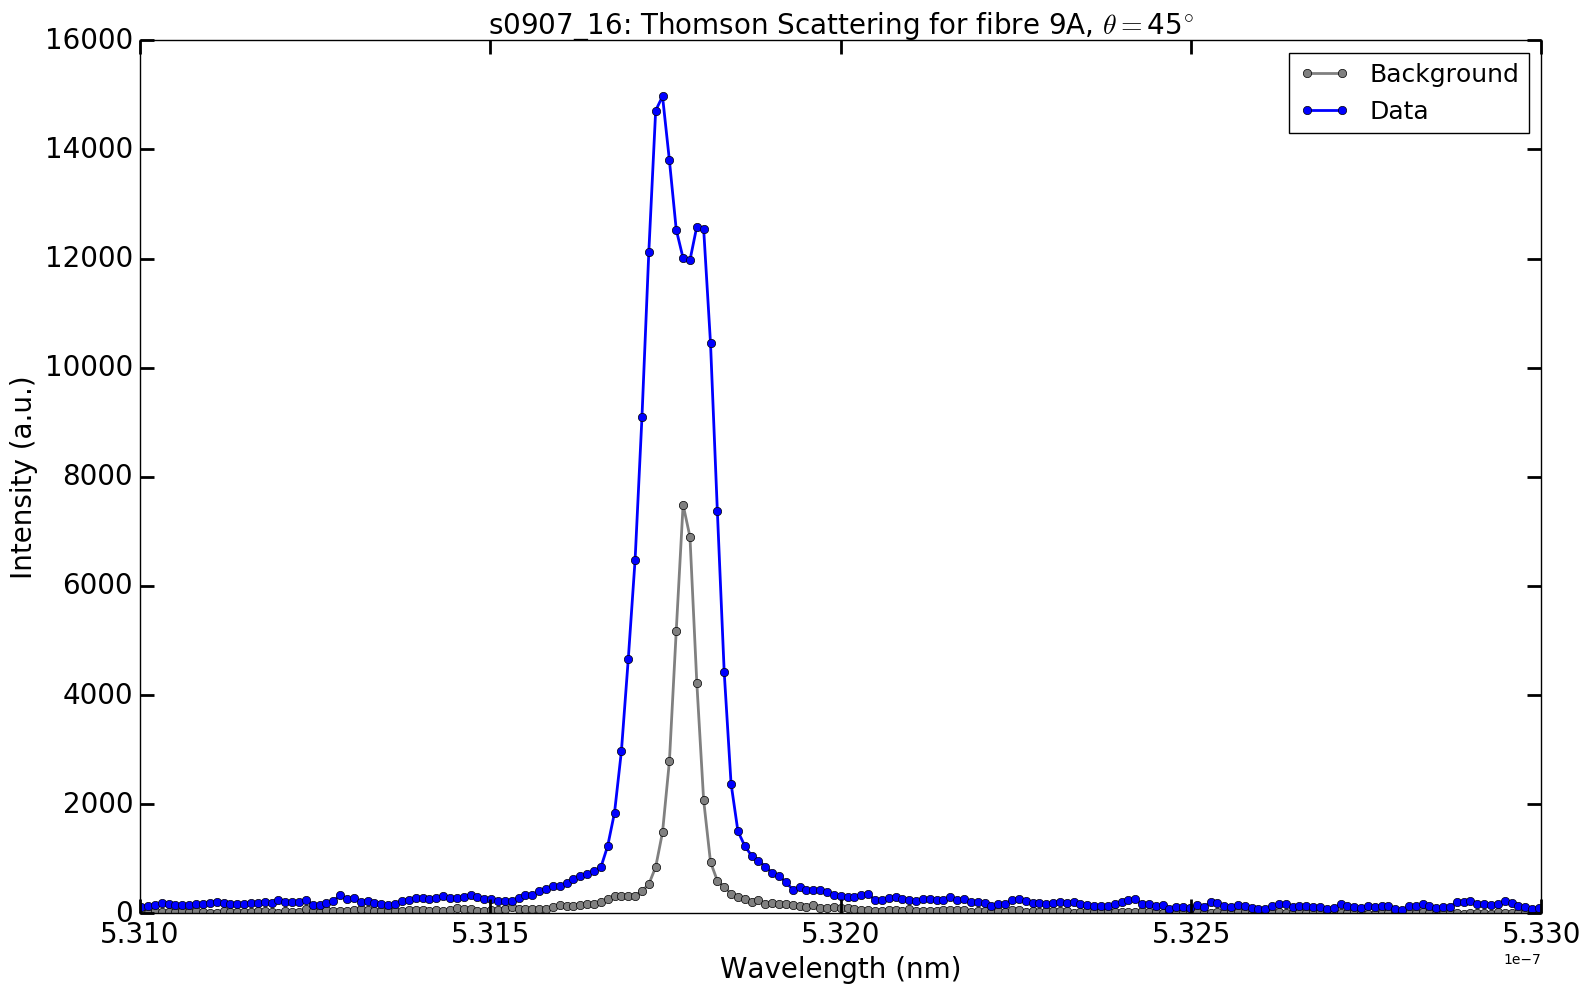

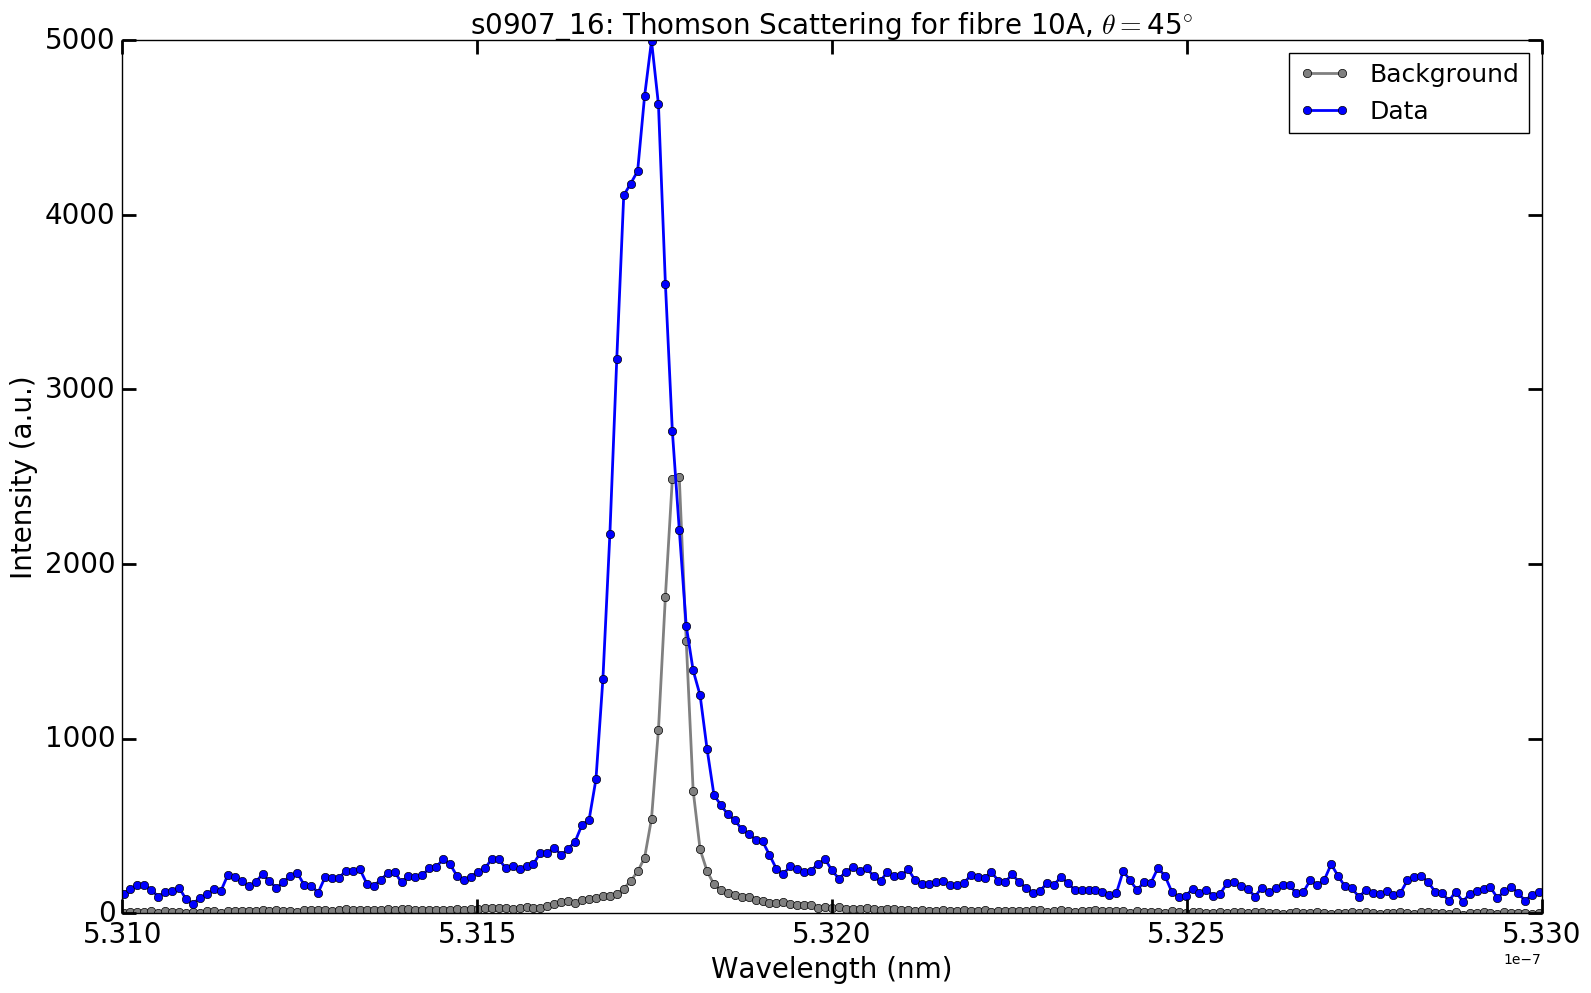

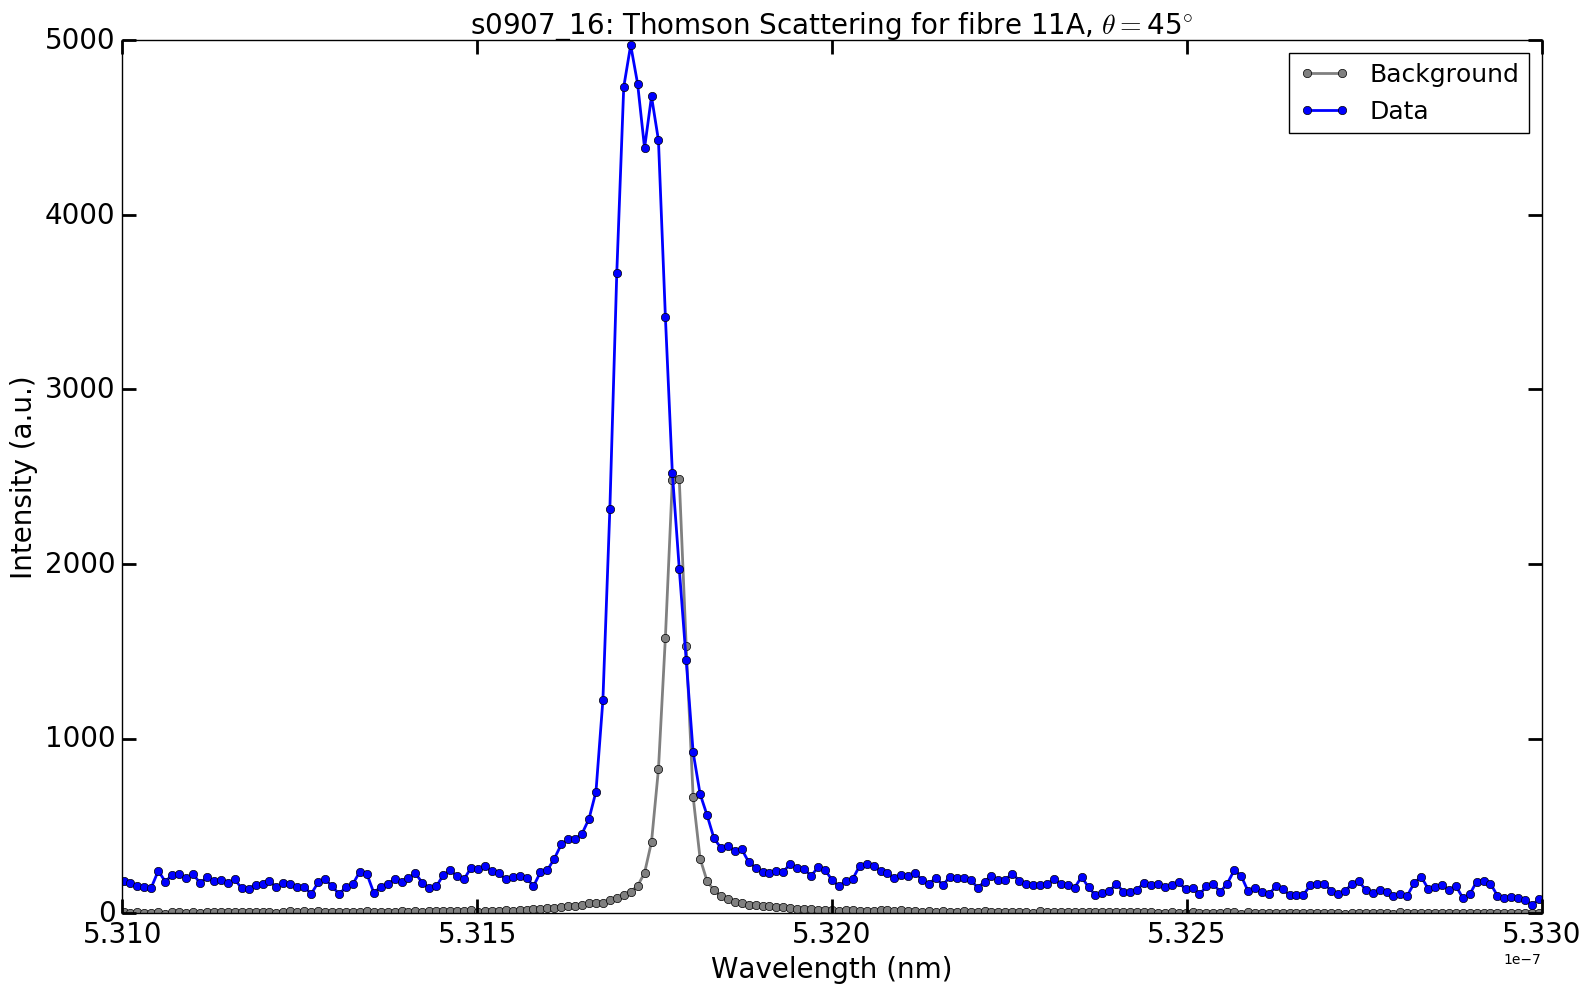

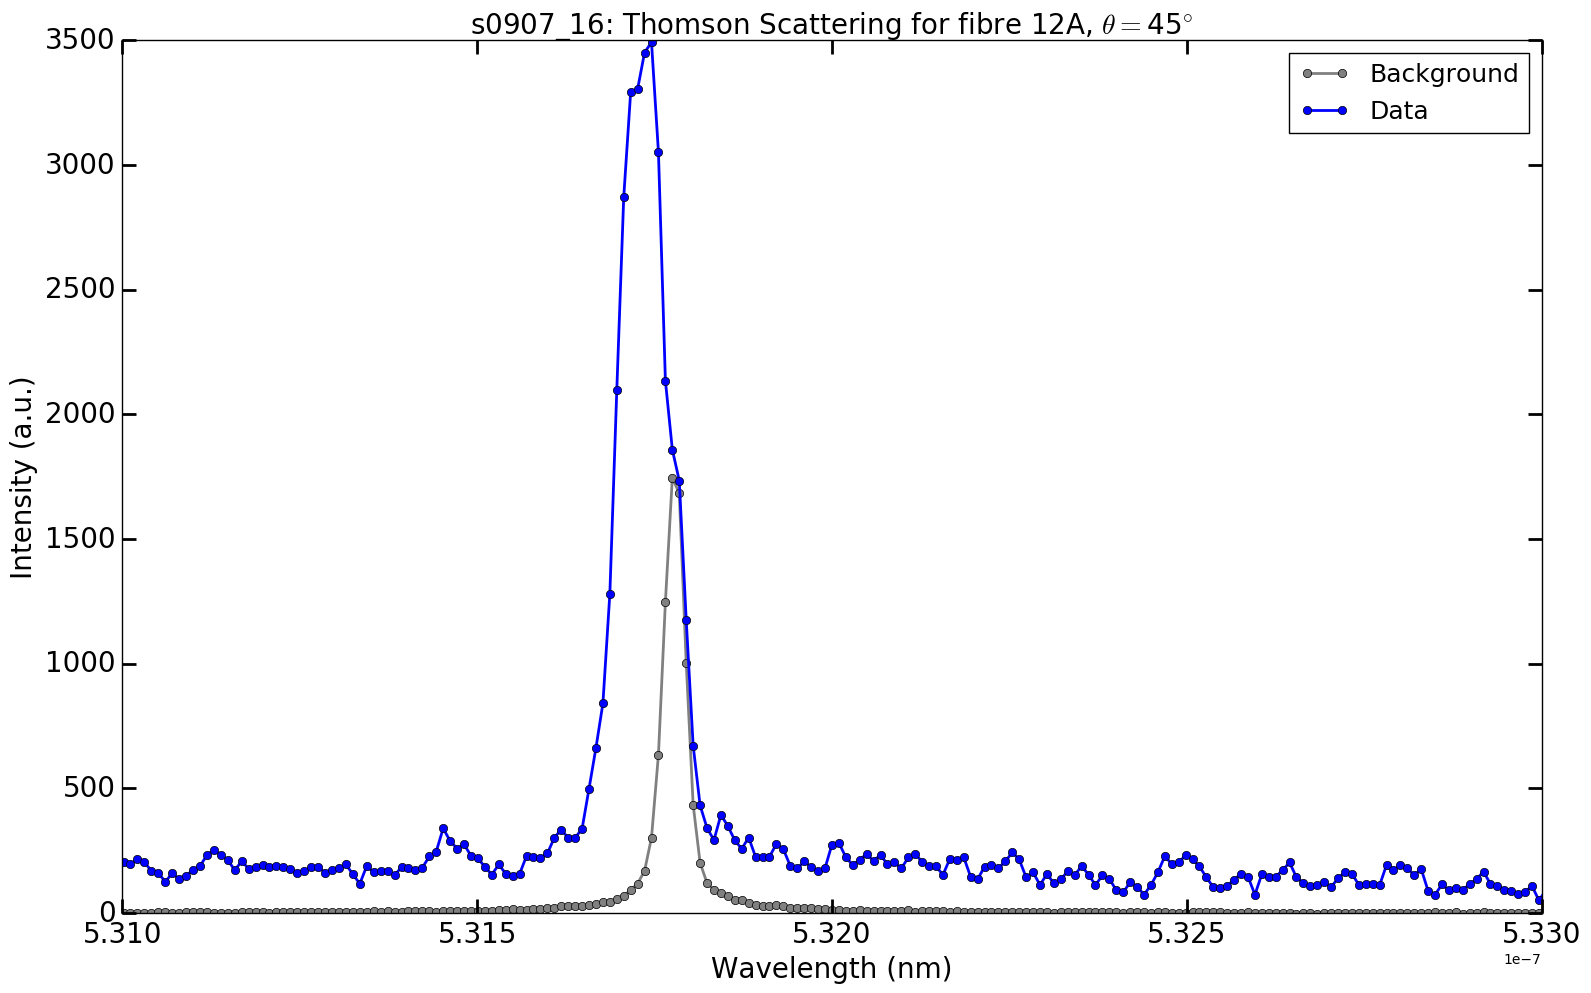

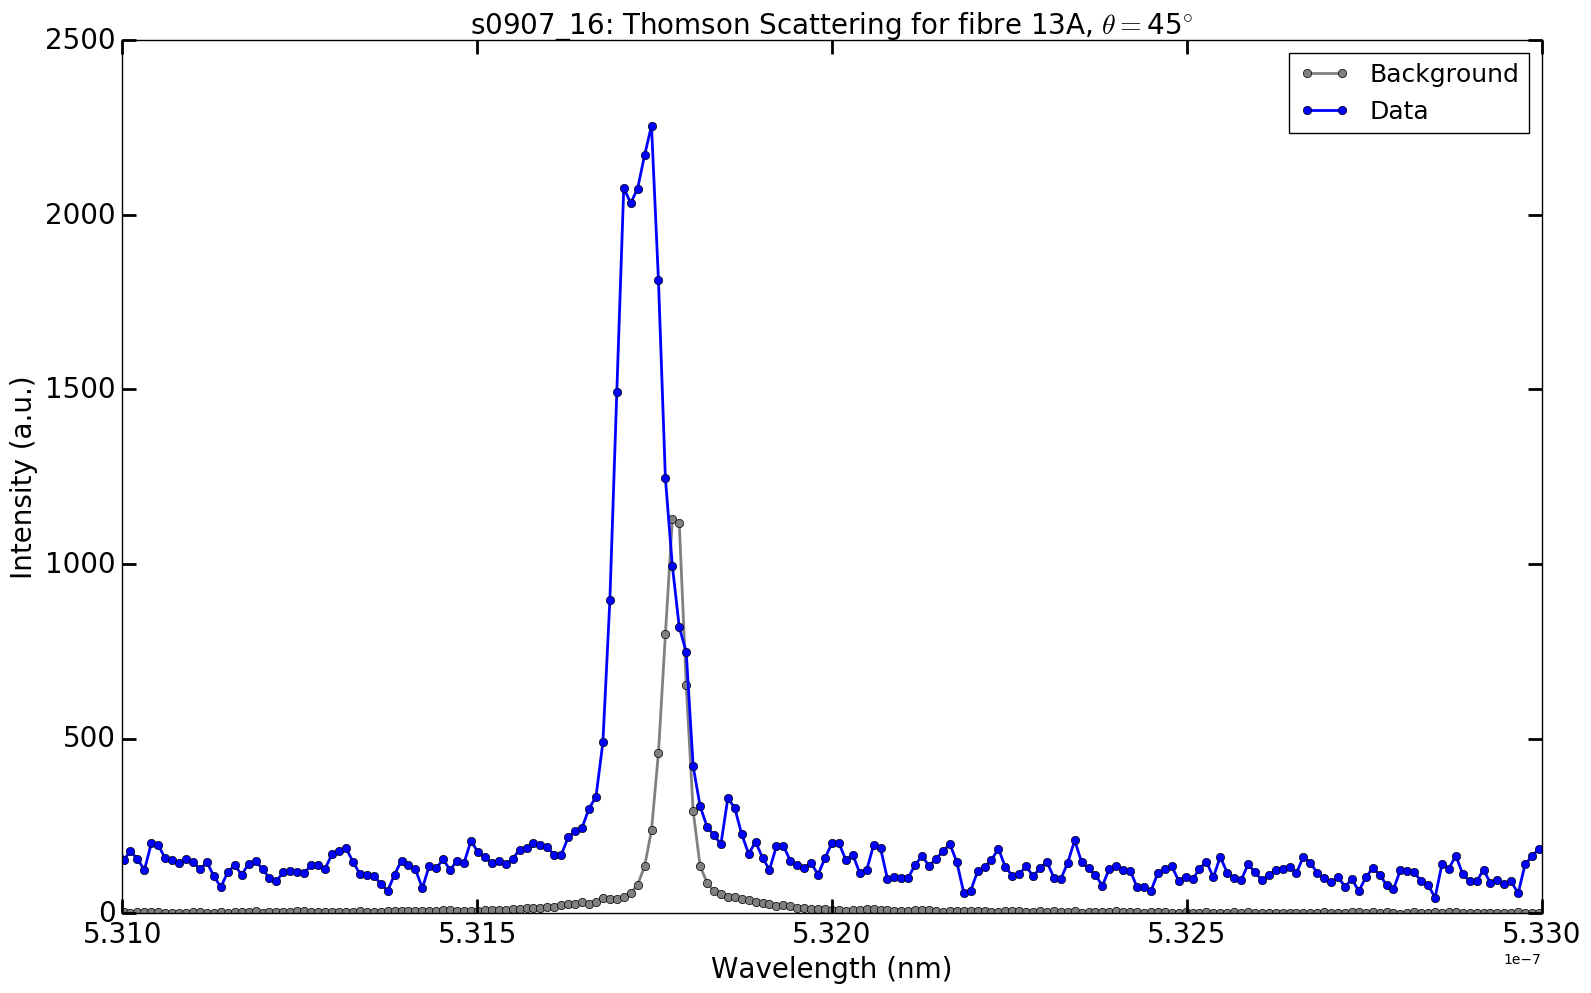

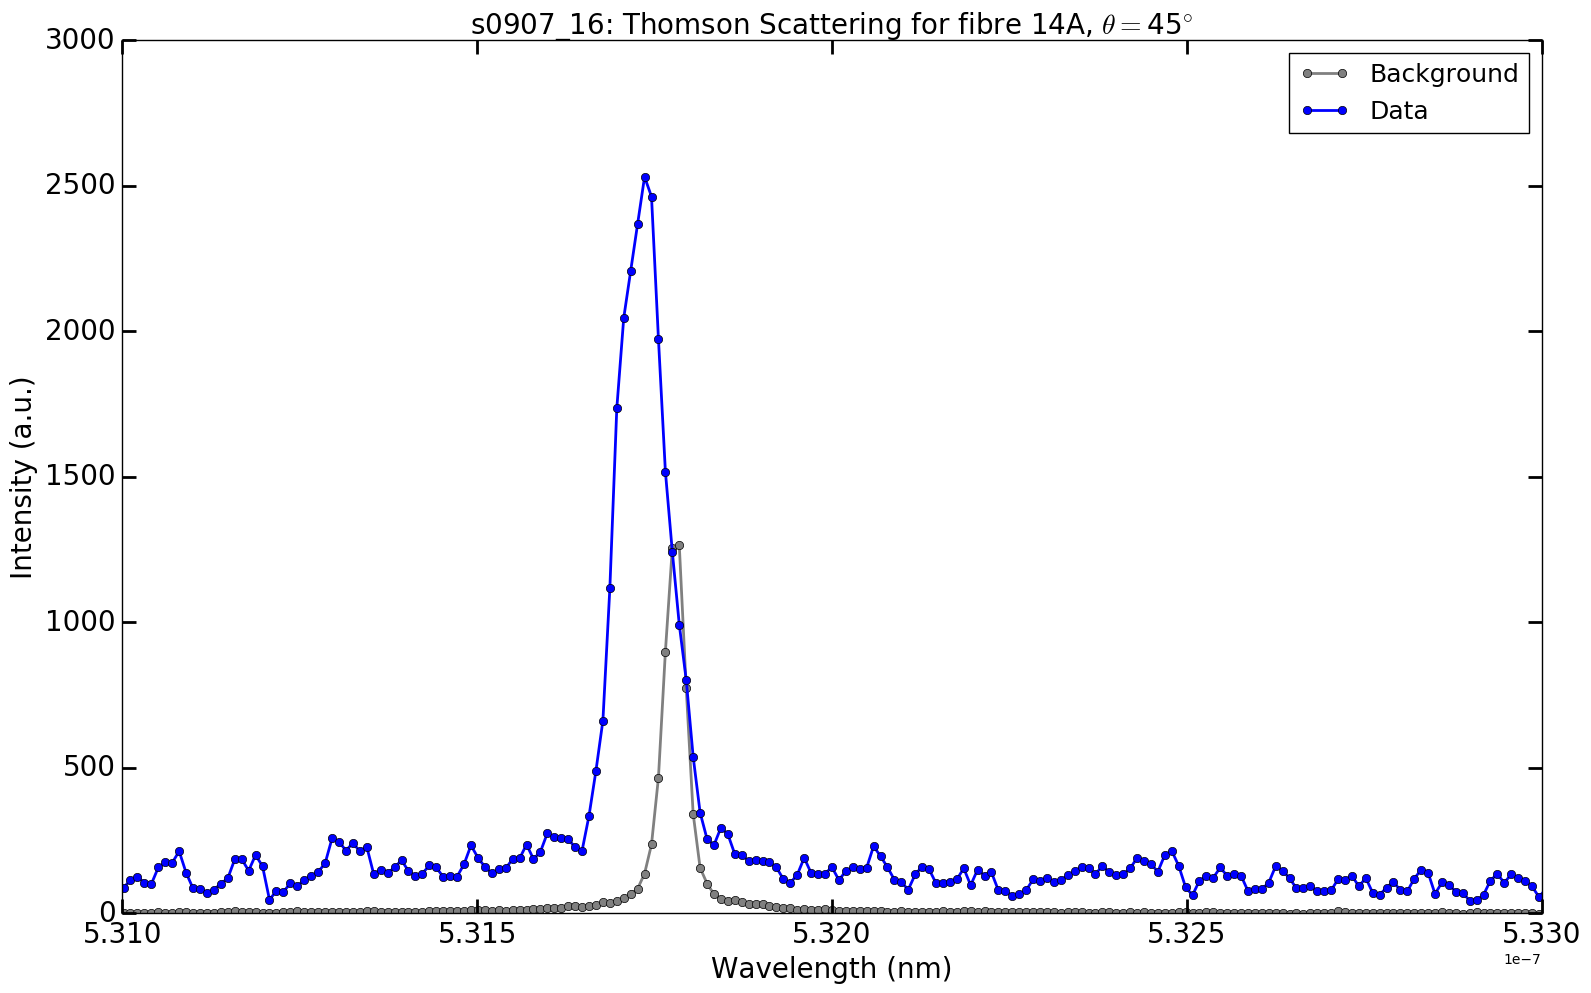

In [6]:
for i in range(1,15):
    ts.plot_data(Fnum=i, Fset='A')

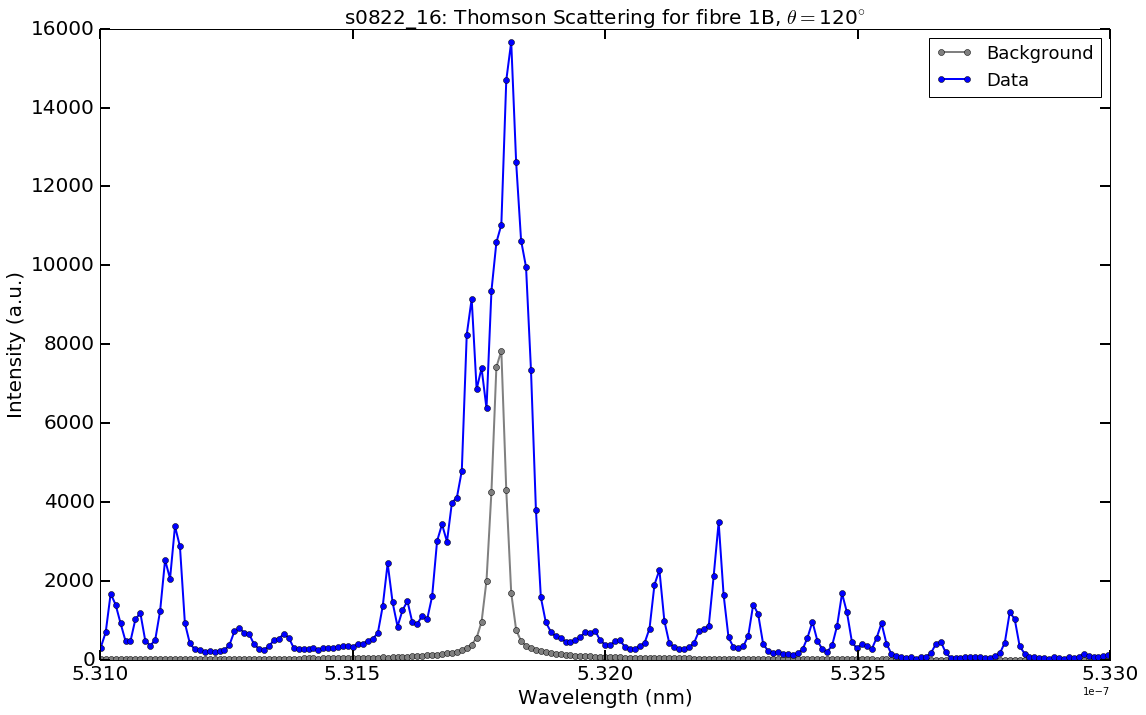

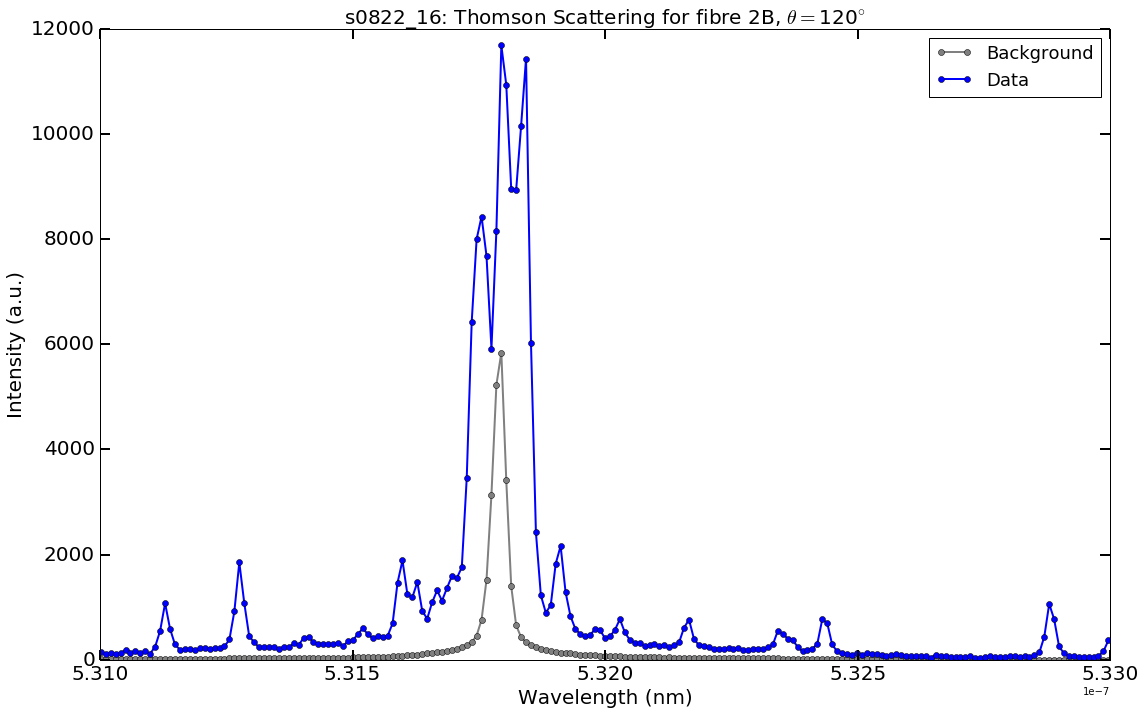

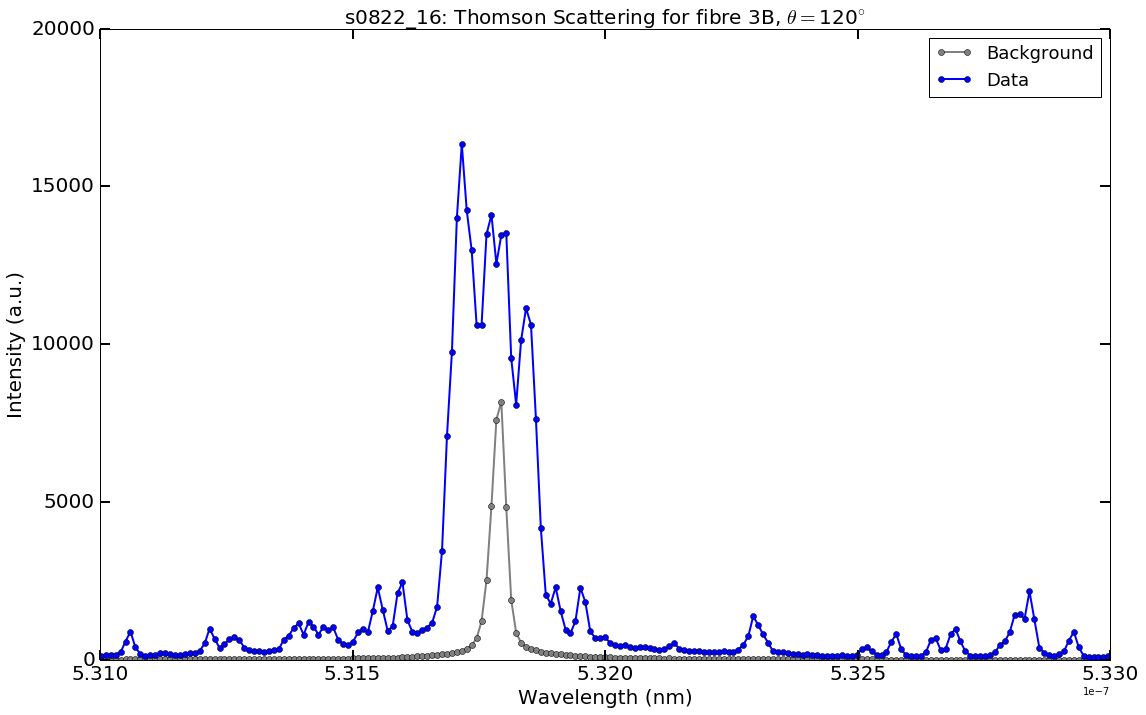

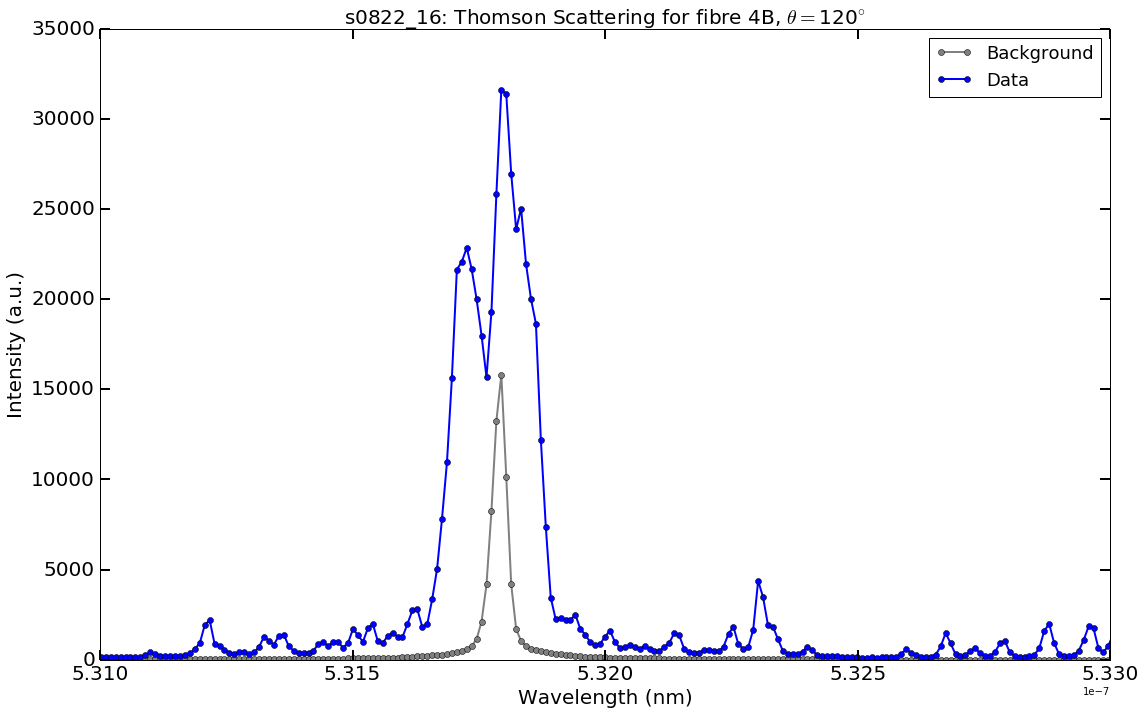

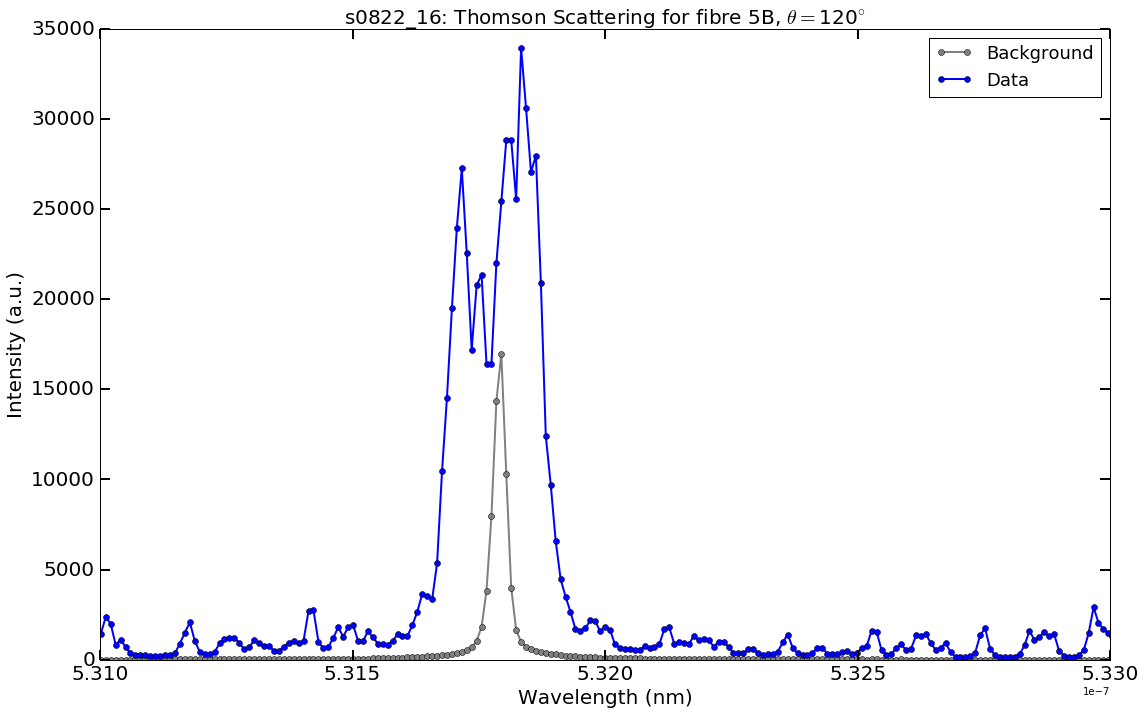

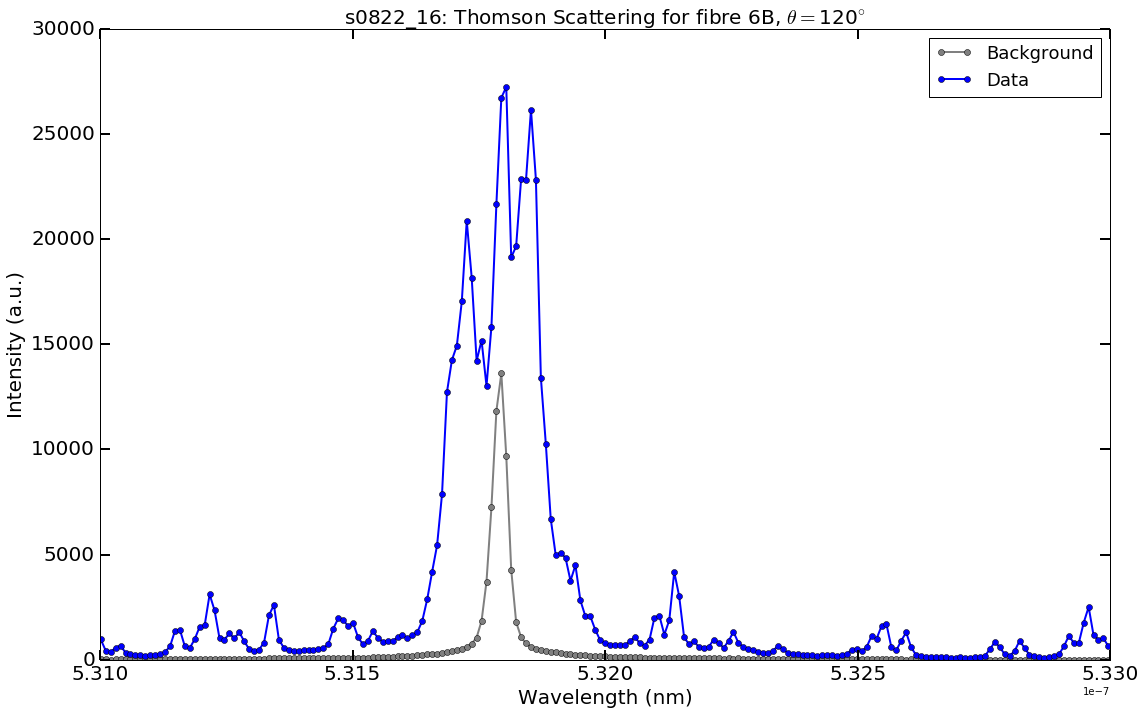

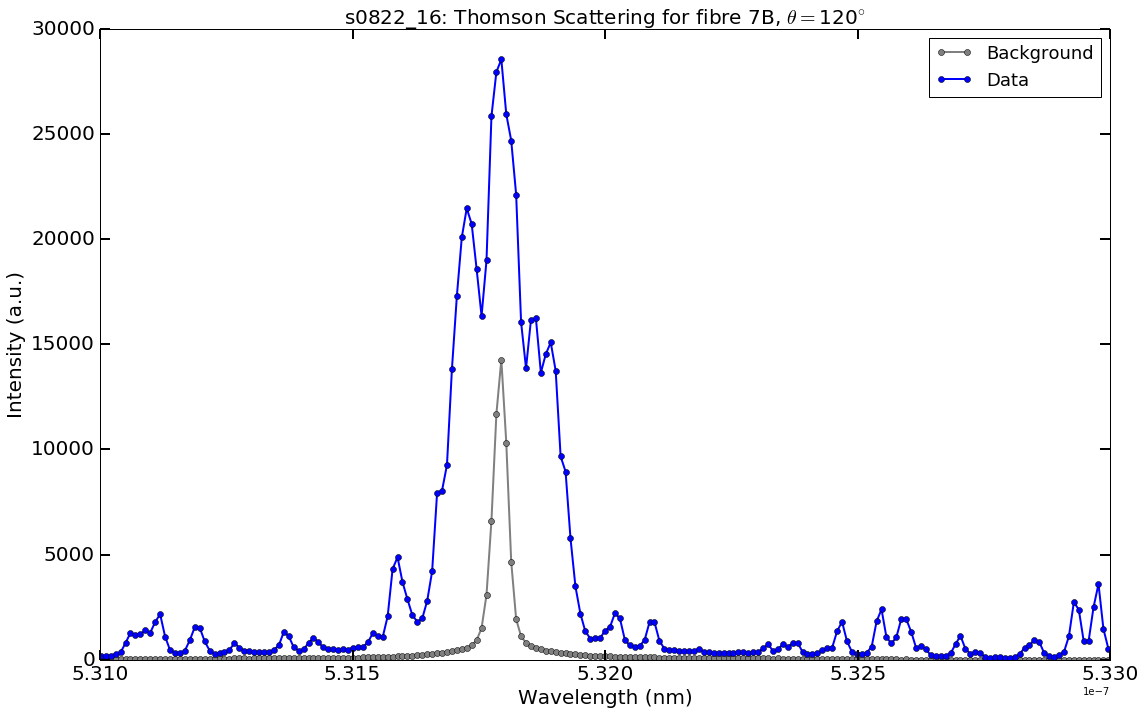

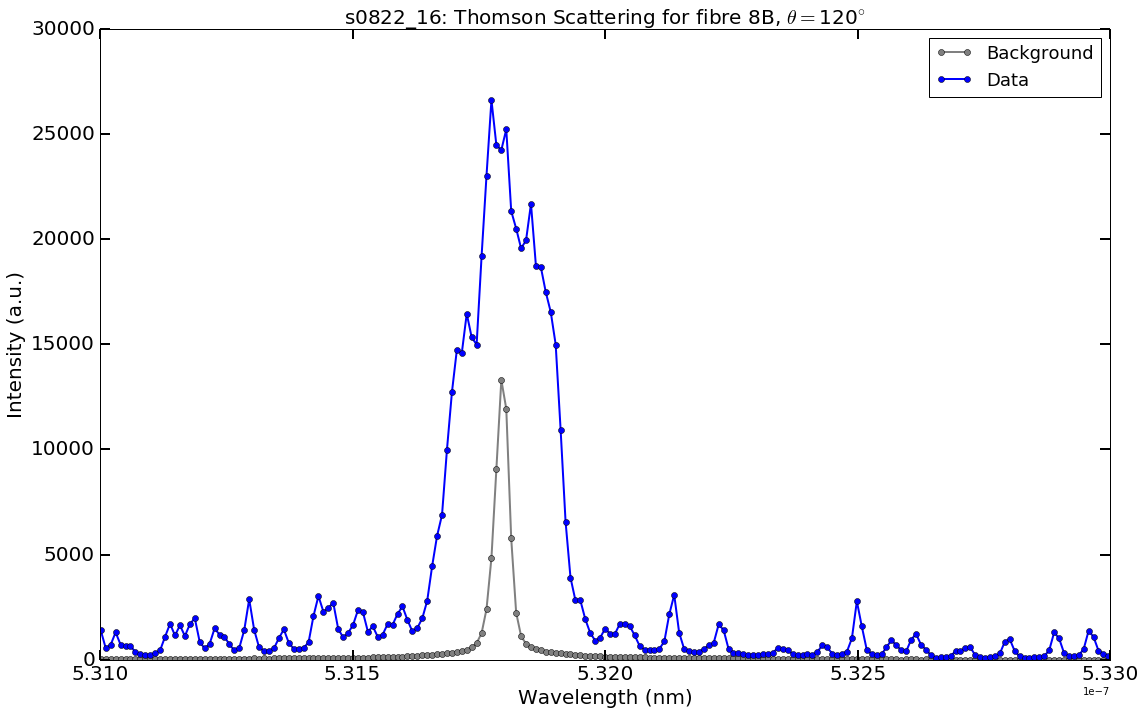

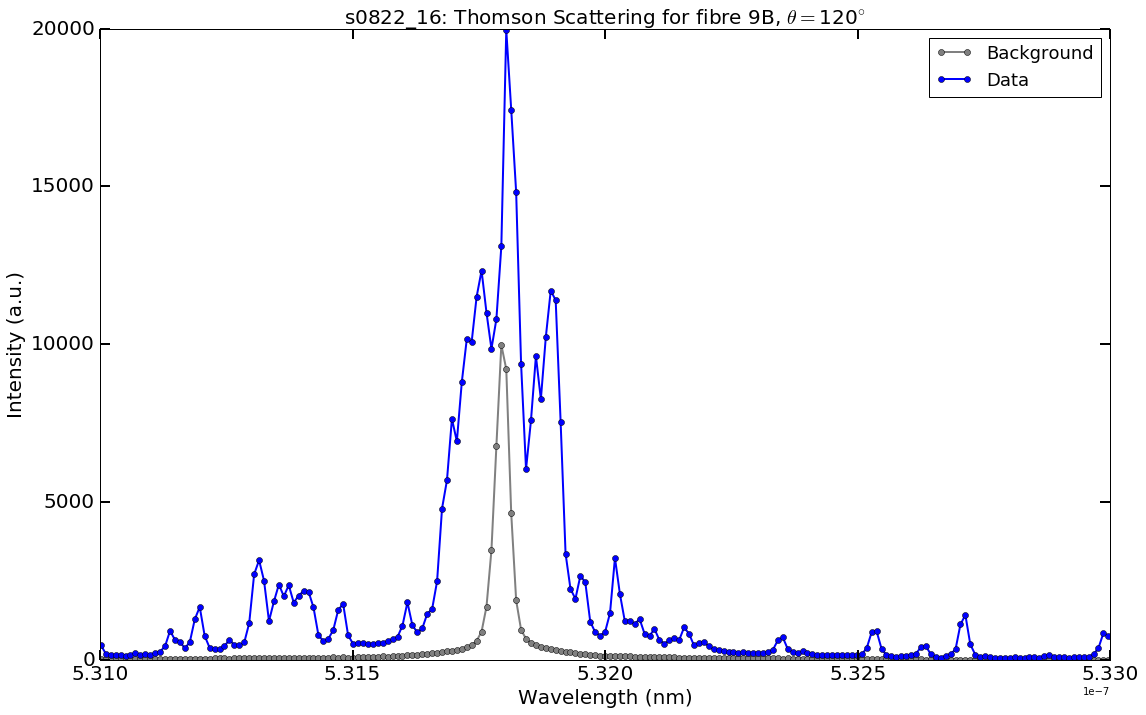

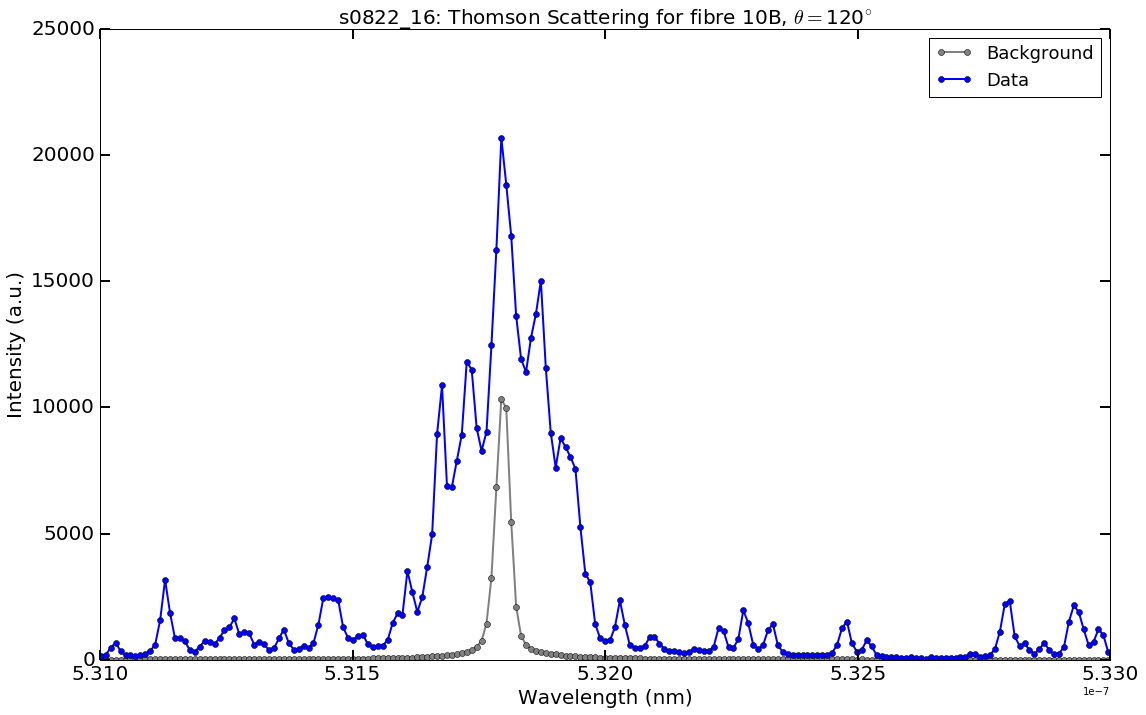

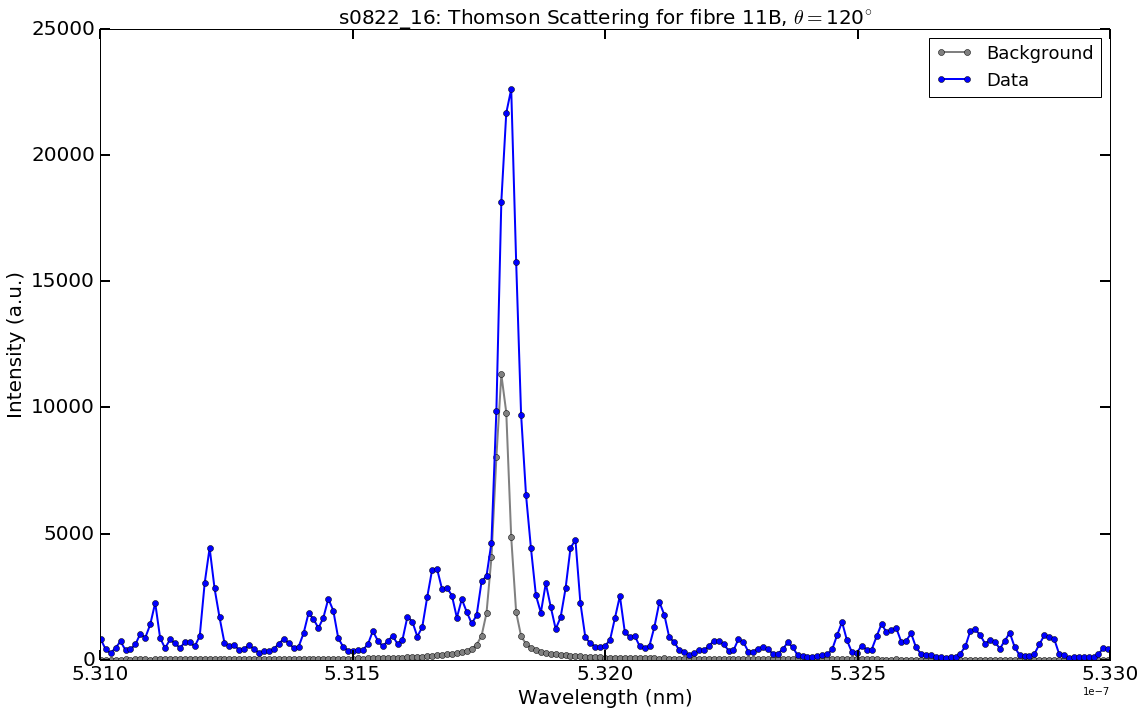

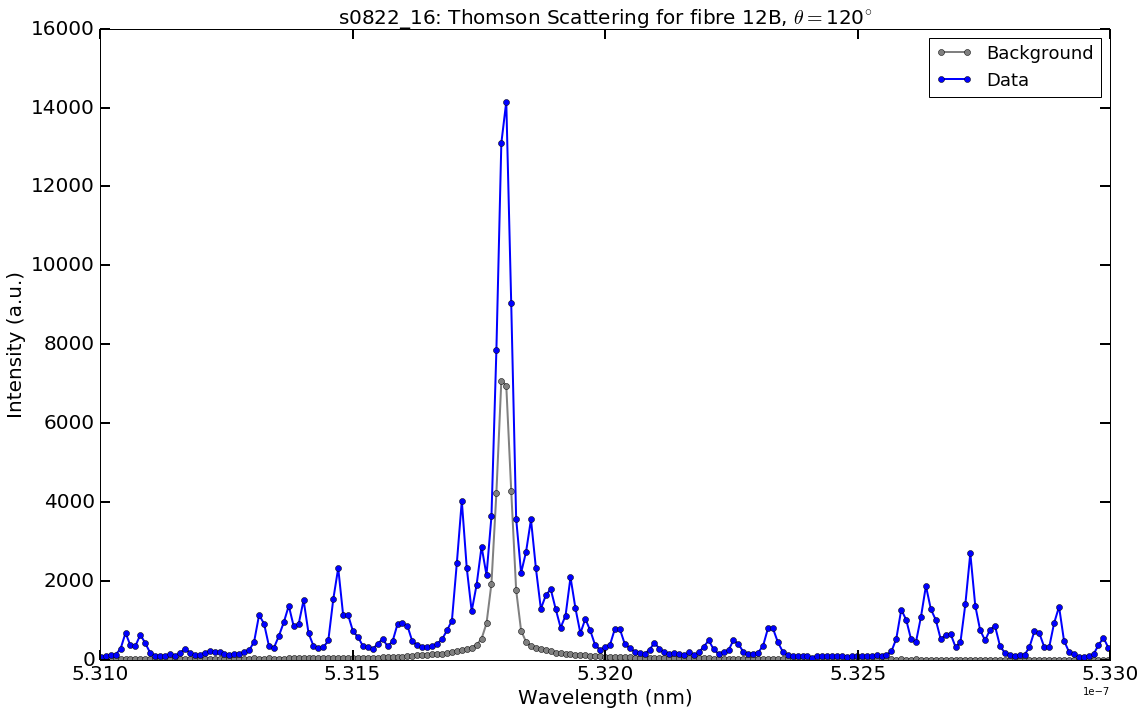

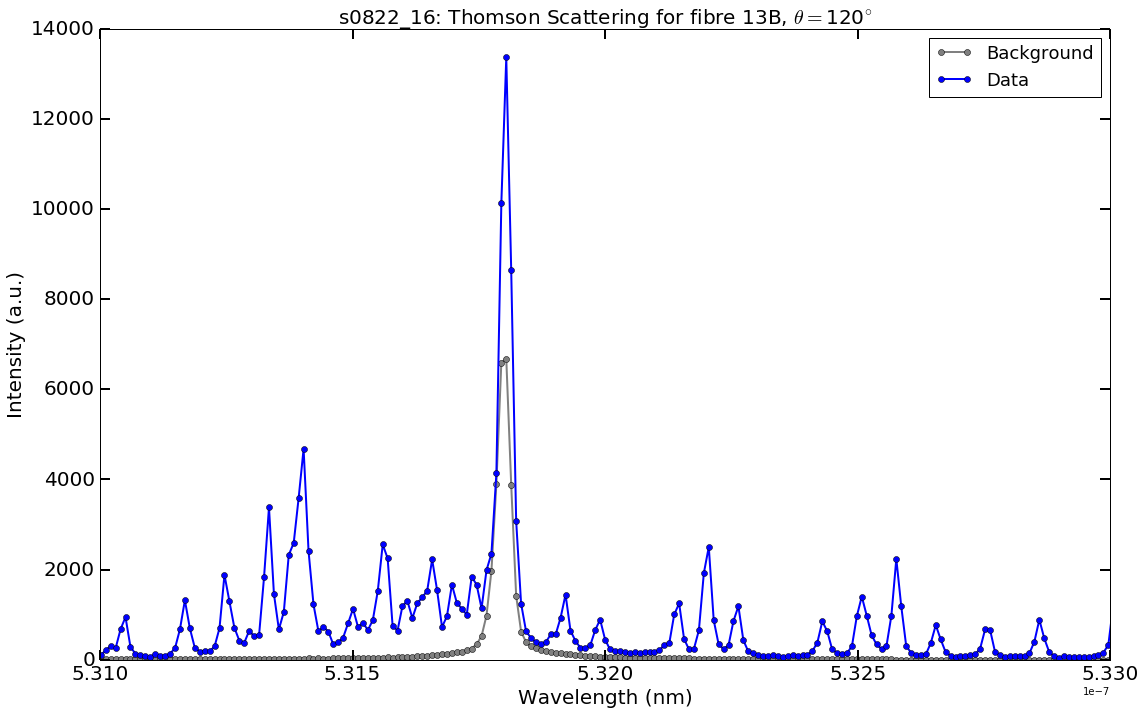

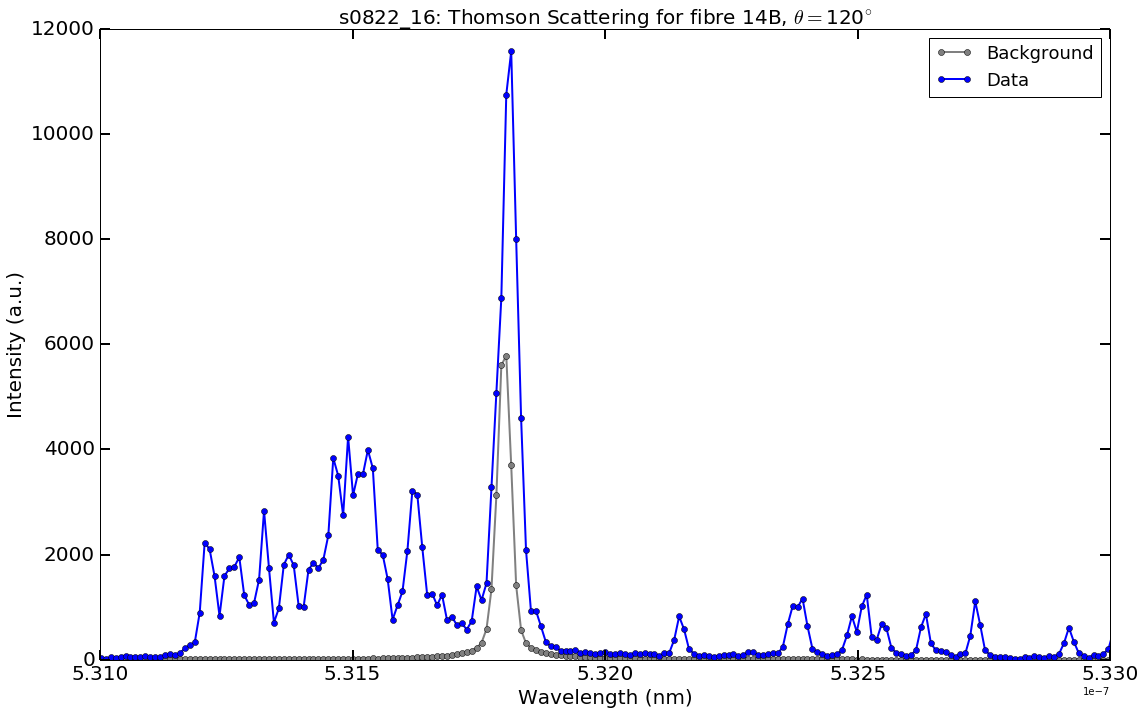

In [14]:
for i in range(1,15):
    ts.plot_data(Fnum=i, Fset='B')